# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd

# LOAD THE DATASET USING USING PANDAS

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# DROPING THE USELESS COLUMNS

In [6]:
# drop last three columns
df.drop(columns=['Unnamed: 2' ,'Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# RENAMING THE COLUMNS FOR BETTER UNDERSTANDING

In [8]:

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

# CHECKING THE DUPLICATES VALUES

In [14]:
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

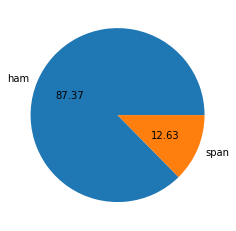

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','span'],autopct="%0.2f")
plt.show()

# APPLYING TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.text,df.target,test_size=0.25)

In [22]:
x_train

2817    Thk some of em find wtc too far... Weiyi not g...
4986    No rushing. I'm not working. I'm in school so ...
4584    U have a Secret Admirer who is looking 2 make ...
5198    She.s fine. I have had difficulties with her p...
4940    Omg you can make a wedding chapel in frontierv...
                              ...                        
831     Hi mate its RV did u hav a nice hol just a mes...
1560    Just got some gas money, any chance you and th...
2516                               Yes.i'm in office da:)
1809                Aight, I'll ask a few of my roommates
3779                              Then ur physics get a-?
Name: text, Length: 3876, dtype: object

In [23]:
y_train


2817    0
4986    0
4584    1
5198    0
4940    0
       ..
831     0
1560    0
2516    0
1809    0
3779    0
Name: target, Length: 3876, dtype: int32

In [24]:
x_test

4973    Aiyo u so poor thing... Then u dun wan 2 eat? ...
1882                     Sorry, I can't help you on this.
1280    Oh ho. Is this the first time u use these type...
1398     No did you check? I got his detailed message now
242     Okay. No no, just shining on. That was meant t...
                              ...                        
2806    December only! Had your mobile 11mths+? You ar...
4664                  Ok set let u noe e details later...
2648    Hi, can i please get a  &lt;#&gt;  dollar loan...
3173                          It vl bcum more difficult..
4177                   Two teams waiting for some players
Name: text, Length: 1293, dtype: object

In [25]:
y_test

4973    0
1882    0
1280    0
1398    0
242     0
       ..
2806    1
4664    0
2648    0
3173    0
4177    0
Name: target, Length: 1293, dtype: int32

In [26]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [27]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [28]:
from sklearn import set_config
set_config(display='diagram')

In [29]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

# TRAINING THE MODEL

In [30]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [32]:
emails

['Sounds great! Are you home now?',
 'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES']

# PREDICT THE MODEL

In [33]:
clf.predict(emails)

array([0, 1])

# ACCURACY CHECK

In [34]:
clf.score(x_test,y_test)

0.9891724671307038